* This notebook is prepared by __Ahmed Saad El Fiky__. 
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\csqrttwo}[1]{\frac{#1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

# Bell States
Bell states are the four states that can be created when two qubits are maximally entangled.\
The four states are represented as so: 
$$ \ket{\phi^+} = \frac{ \ket{00} + \ket{11} }{\sqrt2} \equiv \ket{\beta_{00}} $$
$$ \ket{\psi^+} = \frac{ \ket{01} + \ket{10} }{\sqrt2} \equiv \ket{\beta_{01}} $$
$$ \ket{\phi^-} = \frac{ \ket{00} - \ket{11} }{\sqrt2} \equiv \ket{\beta_{10}} $$
$$ \ket{\psi^-} = \frac{ \ket{01} - \ket{10} }{\sqrt2} \equiv \ket{\beta_{11}} $$


Input, Output states and Bell Circuit:
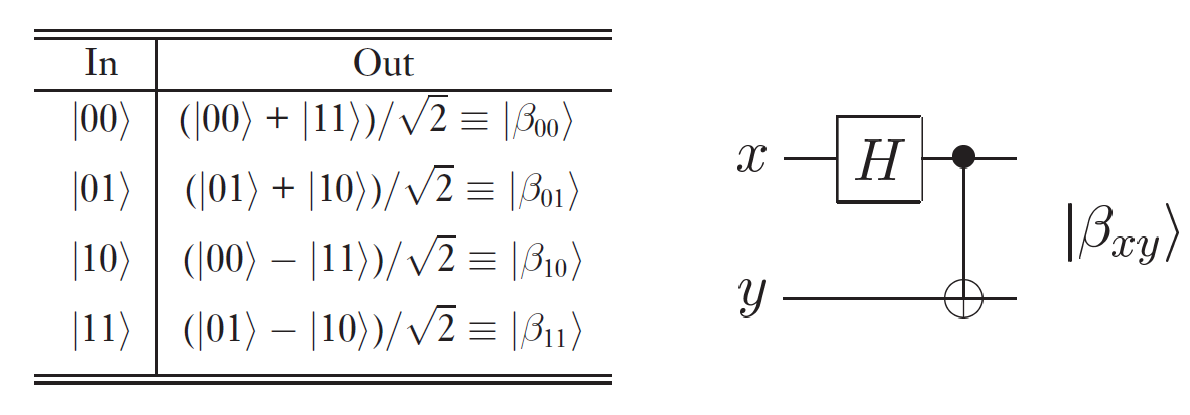

### Generation of Bell States using IBM Qiskit:

In [1]:
# Importing standard Qiskit libraries
import qiskit
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

Input state = |00>


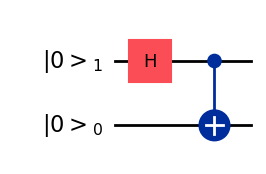

Output state |β00>=


<IPython.core.display.Latex object>

----------------------------------------------------------------------------------------------------
Input state = |01>


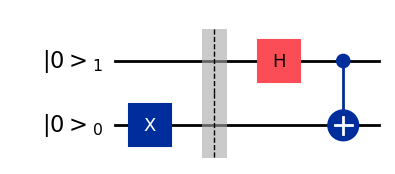

Output state |β01>=


<IPython.core.display.Latex object>

----------------------------------------------------------------------------------------------------
Input state = |10>


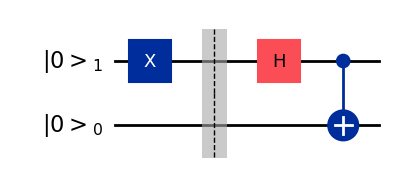

Output state |β10>=


<IPython.core.display.Latex object>

----------------------------------------------------------------------------------------------------
Input state = |11>


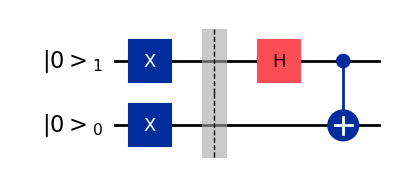

Output state |β11>=


<IPython.core.display.Latex object>

----------------------------------------------------------------------------------------------------


In [2]:
# Define a list with the possible input states for the Entanglement preparation circuit:
inputs = ["00", "01", "10", "11"]

for i, input in enumerate(inputs):
    # Create the Quantum Circuit with 2 qubits:
    q = QuantumRegister(2, "|0>")
    qc = QuantumCircuit(q)

    # Display the input states:
    print(f"Input state = |{input}>")
    if input[0] == "1":
        qc.x(q[1])    # apply NOT gate
    if input[1] == "1":
        qc.x(q[0])    # apply NOT gate
    if input != "00":
        qc.barrier()
    
    # Insert the entanglement circuit:
    qc.h(q[1])
    qc.cx(q[1],q[0])

    # Display the Bell Circuit:
    display(qc.draw('mpl', reverse_bits= True, plot_barriers= True, style="iqp"))

    # Display the output state:
    print(f"Output state |β{input}>=")
    display(Statevector(qc).draw("latex"))
    # display(plot_state_qsphere(Statevector(qc)))

    # Separate the Circuits
    print("-"*100)

In [3]:
# Define a function to take the input state form the user
# and create the entanglemnt circuit and display the output statevector
# Display the output state on Bloch sphere

def Bell_state(input):
    # Create the Quantum Circuit with 2 qubits:
    q = QuantumRegister(2, "|0>")
    qc = QuantumCircuit(q)
    
    if input[0] == "1":
        qc.x(q[1])    # apply NOT gate
    if input[1] == "1":
        qc.x(q[0])    # apply NOT gate
    if input != "00":
        qc.barrier()
        
    # Insert the entanglement circuit:
    qc.h(q[1])
    qc.cx(q[1],q[0])

    # Display the Bell Circuit:
    display(qc.draw('mpl', reverse_bits= True, plot_barriers= True, style="iqp"))

    # Display the output state:
    display(Statevector(qc).draw("latex"))
    display(plot_state_qsphere(Statevector(qc)))

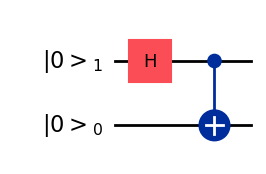

<IPython.core.display.Latex object>

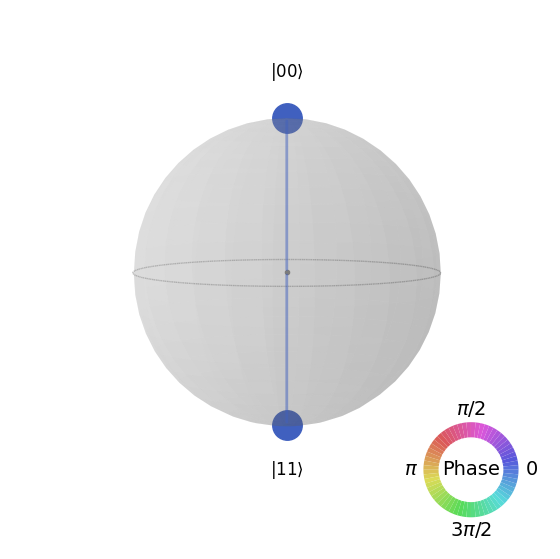

In [4]:
Bell_state('00')

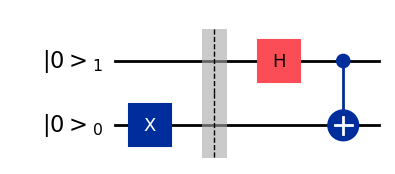

<IPython.core.display.Latex object>

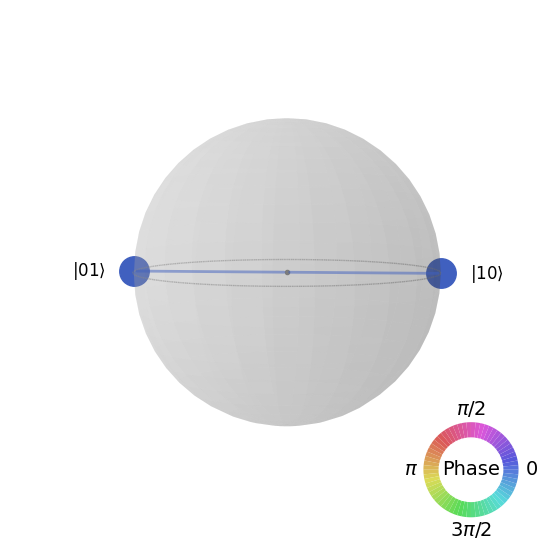

In [5]:
Bell_state('01')

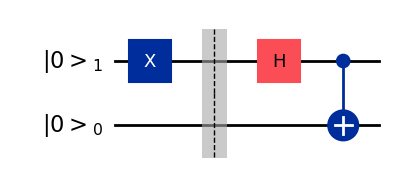

<IPython.core.display.Latex object>

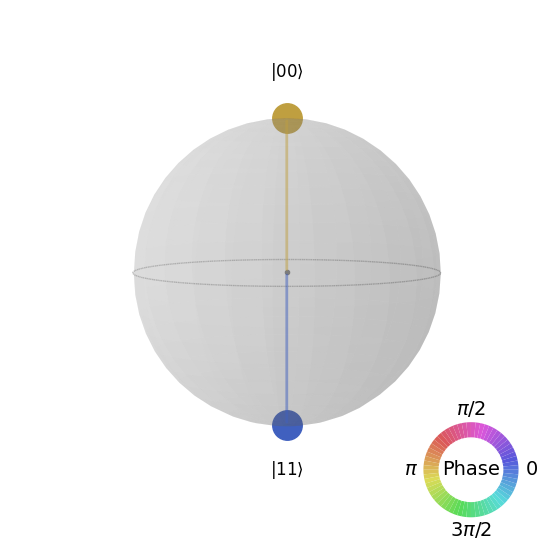

In [6]:
Bell_state('10')

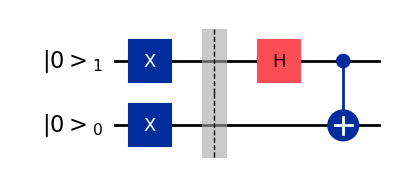

<IPython.core.display.Latex object>

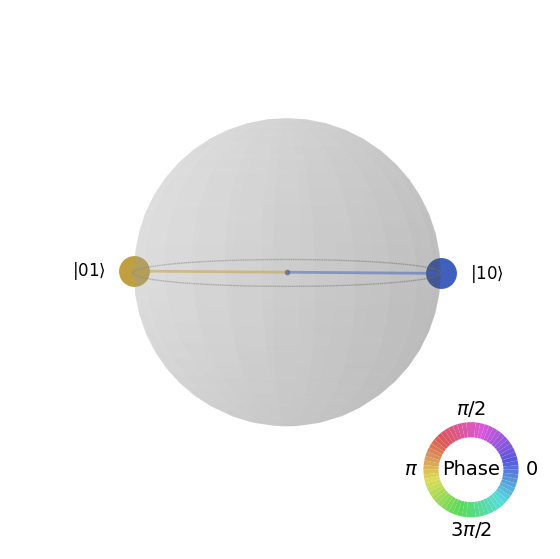

In [7]:
Bell_state('11')

***